In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf



In [70]:
#  Import and read the charity_data.csv.
import pandas as pd 
motor_df = pd.read_csv('Resources/Motor_Vehicle_Crashes_-_Vehicle_Information__Three_Year_Window.csv')
motor_df.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2018,15232120,VAN TRUCK,AGRICULTURAL TRUCK,Parked,Not Entered,North,Gas,2015.0,NY,0.0,4.0,NISSA,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,3N6CM0KN2FK713460
1,2018,15232535,SUBURBAN,PASSENGER OR SUBURBAN,Making U Turn,Not Entered,South,Gas,2015.0,NY,1.0,6.0,HONDA,HUMAN,Not Entered,HUMAN,Unknown,Not Entered,5J6TF2H55FL001556
2,2018,15232536,SEDAN,Not Entered,Going Straight Ahead,Not Entered,North,Not Entered,NaN,PA,1.0,NaN,NaN,HUMAN,Not Entered,HUMAN,Unknown,Not Entered,NaN
3,2018,15232557,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,Not Entered,South,Gas,2013.0,NY,5.0,4.0,NISSA,HUMAN,Passenger Distraction,VEHICLE,Other*,Not Entered,1N4AL3AP8DC229156
4,2018,15232556,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2009.0,NY,2.0,8.0,CADIL,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Entered,3GYFK22209G213337


In [71]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME','Contributing Factor 1 Description',
# Contributing Factor 2','Contributing Factor 2 Description'.

motor_df = motor_df.drop(['Case Vehicle ID', 'Partial VIN', 'Contributing Factor 1 Description',
                          'Contributing Factor 2 Description'], axis=1)

In [72]:
# Dropping rows with no value

motor_df = motor_df.dropna()

In [73]:
# Determine the number of unique values in each column.

motor_df.nunique()

Year                               2
Vehicle Body Type                 51
Registration Class                64
Action Prior to Accident          21
Type / Axles of Truck or Bus       5
Direction of Travel               10
Fuel Type                          9
Vehicle Year                      95
State of Registration             15
Number of Occupants               64
Engine Cylinders                  14
Vehicle Make                    1212
Contributing Factor 1              3
Contributing Factor 2              3
Event Type                        34
dtype: int64

In [74]:
# Looking at the Vehicle Make column

motor_count = motor_df['Vehicle Make'].value_counts()
motor_count.head()

TOYOT    177391
HONDA    147435
FORD     123621
CHEVR    121472
NISSA    110520
Name: Vehicle Make, dtype: int64

<AxesSubplot:ylabel='Density'>

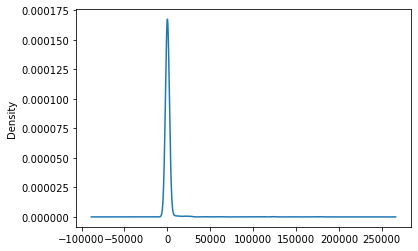

In [13]:
# Visualize the value counts of APPLICATION_TYPE

motor_count.plot.density()

In [75]:
# Determine which values to replace if counts are less than 5000

replace_Vehicle = list(motor_count[motor_count < 10000].index)
replace_Vehicle
# Replace in dataframe
for car in replace_Vehicle:
    motor_df["Vehicle Make"] = motor_df["Vehicle Make"].replace(car,"Other")
    
# Check to make sure binning was successful
motor_df['Vehicle Make'].value_counts()

TOYOT    177391
HONDA    147435
FORD     123621
CHEVR    121472
NISSA    110520
Other    104774
JEEP      60810
HYUND     54558
DODGE     44049
SUBAR     39699
BMW       27585
KIA       27095
ME/BE     26789
GMC       23576
VOLKS     22319
CHRYS     20810
LEXUS     20190
ACURA     19501
MAZDA     17837
INFIN     15117
BUICK     12566
RAM       12515
AUDI      12384
CADIL     10037
Name: Vehicle Make, dtype: int64

In [77]:
# Recode Vehicle Make to integer: LinearRegression does not take string

def Classification(X):
    if X == 'TOYOT':
        return 0
    elif X == 'HONDA':
        return 1
    elif X == 'FORD':
        return 2
    elif X == 'CHEVR':
        return 3
    elif X == 'NISSA':
        return 4
    elif X == 'Other':
        return 5
    elif X == 'JEEP':
        return 6
    elif X == 'HYUND':
        return 7
    elif X == 'DODGE':
        return 8
    elif X == 'SUBAR':
        return 9
    elif X == 'BMW':
        return 10
    elif X == 'KIA':
        return 11
    elif X == 'ME/BE':
        return 12
    elif X == 'GMC':
        return 13
    elif X == 'VOLKS':
        return 14
    elif X == 'CHRYS':
        return 15
    elif X == 'LEXUS':
        return 16
    elif X == 'ACURA':
        return 17
    elif X == 'MAZDA':
        return 18
    elif X == 'INFIN':
        return 19
    elif X == 'BUICK':
        return 20
    elif X == 'RAM':
        return 21
    elif X == 'AUDI':
        return 22
    else :
        return 23

motor_df['Vehicle Make'] = motor_df['Vehicle Make'].apply(Classification)

In [79]:
# Determine if the names in the Vehicle make column were replaced by number

motor_df['Vehicle Make'].value_counts()

0     177391
1     147435
2     123621
3     121472
4     110520
5     104774
6      60810
7      54558
8      44049
9      39699
10     27585
11     27095
12     26789
13     23576
14     22319
15     20810
16     20190
17     19501
18     17837
19     15117
20     12566
21     12515
22     12384
23     10037
Name: Vehicle Make, dtype: int64

In [80]:
# Look at Vehicle_Year value counts for binning

year_count = motor_df['Vehicle Year'].value_counts()
year_count.head()

2017.0    127918
2016.0    113174
2015.0    103314
2018.0     96443
2014.0     83846
Name: Vehicle Year, dtype: int64

In [81]:
# Look at Vehicle_Year value counts for binning

registration_count = motor_df['State of Registration'].value_counts()
registration_count.head()

NY    1252625
PA          5
OK          5
NJ          3
MD          2
Name: State of Registration, dtype: int64

In [82]:
# Determine which values to replace if counts are less than 100

replace_registration = list(registration_count[registration_count < 100].index)

# Replace in dataframe
for reg in replace_registration:
    motor_df['State of Registration'] = motor_df['State of Registration'].replace(reg,"Other")
    
# Check to make sure binning was successful
motor_df['State of Registration'].value_counts()

NY       1252625
Other         25
Name: State of Registration, dtype: int64

In [84]:
# Look at Regristration Class value counts for binning

class_count = motor_df['Registration Class'].value_counts()
class_count.head()

PASSENGER OR SUBURBAN    1042705
OMNIBUS - TAXI             67053
AGRICULTURAL TRUCK         39954
COMMERCIAL                 22949
SPECIAL PASSENGER          18913
Name: Registration Class, dtype: int64

In [87]:
# Determine which values to replace if counts are less than 4000

replace_class = list(class_count[class_count < 4000].index)

# Replace in dataframe
for Class in replace_class:
    motor_df['Registration Class'] = motor_df['Registration Class'].replace(Class,"Other")
    
# Check to make sure binning was successful
motor_df['Registration Class'].value_counts()

PASSENGER OR SUBURBAN         1042705
OMNIBUS - TAXI                  67053
AGRICULTURAL TRUCK              39954
COMMERCIAL                      22949
SPECIAL PASSENGER               18913
Other                           17212
POLITICAL SUBDIVISION           15557
MOTORCYCLE                       7450
ORGANIZATIONAL                   5494
INTERNATIONAL REGISTRATION       5484
OMNIBUS - REGULAR                5215
OMNIBUS - LIVERY                 4664
Name: Registration Class, dtype: int64

In [88]:
# Generate our categorical variable lists
motor_cat = motor_df.dtypes[motor_df.dtypes == "object"].index.tolist()
motor_cat

['Vehicle Body Type',
 'Registration Class',
 'Action Prior to Accident',
 'Type / Axles of Truck or Bus',
 'Direction of Travel',
 'Fuel Type',
 'State of Registration',
 'Contributing Factor 1',
 'Contributing Factor 2',
 'Event Type']

In [89]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list

encode_df = pd.DataFrame(enc.fit_transform(motor_df[motor_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(motor_cat)
encode_df.head()

,Vehicle Body Type_2 DOOR SEDAN,Vehicle Body Type_4 DOOR SEDAN,Vehicle Body Type_ALL TERRAIN VEHICLE,Vehicle Body Type_AMBULANCE,Vehicle Body Type_BUS (OMNIBUS),Vehicle Body Type_CEMENT MIXER,Vehicle Body Type_CONSTRUCTION EQUIPMENT,Vehicle Body Type_CONVERTIBLE,Vehicle Body Type_CUSTOM,Vehicle Body Type_DELIVERY TRUCK,...,"Event Type_Other*, Non-Collision","Event Type_Overturned, Non-Collision","Event Type_Pedestrian, Collision With","Event Type_Railroad Train, Collision With","Event Type_Ran Off Roadway Only, Non-Collision","Event Type_Sign Post, Collision With Fixed Object","Event Type_Snow Embankment, Collision With Fixed Object","Event Type_Submersion, Non-Collision","Event Type_Tree, Collision With Fixed Object",Event Type_Unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Merge one-hot encoded features and drop the originals

motor_df = motor_df.merge(encode_df, left_index=True,right_index=True)
motor_df = motor_df.drop(motor_cat, 1)
motor_df.head()

,Year,Vehicle Year,Number of Occupants,Engine Cylinders,Vehicle Make,Vehicle Body Type_2 DOOR SEDAN,Vehicle Body Type_4 DOOR SEDAN,Vehicle Body Type_ALL TERRAIN VEHICLE,Vehicle Body Type_AMBULANCE,Vehicle Body Type_BUS (OMNIBUS),...,"Event Type_Other*, Non-Collision","Event Type_Overturned, Non-Collision","Event Type_Pedestrian, Collision With","Event Type_Railroad Train, Collision With","Event Type_Ran Off Roadway Only, Non-Collision","Event Type_Sign Post, Collision With Fixed Object","Event Type_Snow Embankment, Collision With Fixed Object","Event Type_Submersion, Non-Collision","Event Type_Tree, Collision With Fixed Object",Event Type_Unknown
0,2018,2015.0,0.0,4.0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,2015.0,1.0,6.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,2013.0,5.0,4.0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,2009.0,2.0,8.0,23,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018,2008.0,0.0,6.0,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
motor_df.rename(columns={ 'Vehicle Make': 'Vehicle_Make'}, inplace=True)


In [92]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = motor_df['Vehicle_Make']
X = motor_df.drop("Vehicle_Make", axis = 1)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [94]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

C:\Users\Patrick\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [101]:
preds
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))


0.1661390682444372


In [103]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, preds)
print(matrix)

[[20087  3921  5680  2827     0  1480     0     0     0     1     0     0
      0     0     0     0     0     0     0     0     0    53     0     0]
 [17302  4079  3660  1850     2  1186     0     0     0    23     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [ 7118   597 11168  2375     0  1885     0     0     0     2     0     0
      0     0     0     0     0     0     0     0     0   479     0     0]
 [ 8431   692 10199  1614     1  1701     0     0     0    13     0     0
      0     0     0     0     0     0     0     0     0   501     0     0]
 [13607  1272  3312  1665     4  1211     0     0     0    16     0     0
      0     0     0     0     0     0     0     0     0    37     0     0]
 [ 5028  2420  7246  2510     0  2426     0     0     1   415     0     0
      0    11     0     0     0     0     0     0     0    94     0     0]
 [ 3086    71  4503  2572     1  1179     0     0     0     0     0     0
      0     0     0     0     0 

In [105]:
report = classification_report(y_test, preds)
print(report)

C:\Users\Patrick\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.19      0.59      0.28     34049
           1       0.25      0.15      0.18     28102
           2       0.16      0.47      0.24     23624
           3       0.07      0.07      0.07     23152
           4       0.31      0.00      0.00     21124
           5       0.15      0.12      0.13     20151
           6       0.00      0.00      0.00     11432
           7       0.00      0.00      0.00     10411
           8       0.00      0.00      0.00      8429
           9       0.00      0.00      0.00      7399
          10       0.00      0.00      0.00      5231
          11       0.00      0.00      0.00      5106
          12       0.00      0.00      0.00      5109
          13       0.00      0.00      0.00      4475
          14       0.00      0.00      0.00      4239
          15       0.00      0.00      0.00      4019
          16       0.00      0.00      0.00      3890
          17       0.00    

C:\Users\Patrick\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Patrick\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
